# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

# Import Library

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from tqdm import tqdm
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

# Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [18]:
data = pd.read_csv('bank-full.csv', delimiter=';', quotechar='"')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Normalize data
normalize numerical data

In [21]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Apply scaling to numeric features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Apply label encoding to categorical features
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Convert target variable 'yes'/'no' to 1/0
y = y.map({'yes': 1, 'no': 0})

# Create Data Loader
create data loader for pytorch

In [22]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model
define your model in here

In [25]:
class BankMarketingNet(nn.Module):
    def __init__(self, input_dim):
        super(BankMarketingNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

In [29]:
input_dim = X_train.shape[1]
model = BankMarketingNet(input_dim)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20

train_loss = []
val_loss = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    
    with tqdm(train_loader, unit="batch") as tepoch:
        for inputs, labels in tepoch:
            tepoch.set_description(f"Epoch {epoch+1}/{num_epochs}")
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            running_train_loss += loss.item()
            tepoch.set_postfix(loss=running_train_loss/len(train_loader))
    
    train_loss.append(running_train_loss / len(train_loader))
    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {running_train_loss/len(train_loader)}')
    
    # Evaluate the model on the validation set
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            running_val_loss += loss.item()
    
    val_loss.append(running_val_loss / len(val_loader))
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {running_val_loss/len(val_loader)}')

print('Training complete')

Epoch 1/20: 100%|██████████| 1131/1131 [00:04<00:00, 250.48batch/s, loss=0.267]


Epoch 1/20, Training Loss: 0.2672419395893944
Epoch 1/20, Validation Loss: 0.24352851152570562


Epoch 2/20: 100%|██████████| 1131/1131 [00:04<00:00, 253.60batch/s, loss=0.237]


Epoch 2/20, Training Loss: 0.23730263237163726
Epoch 2/20, Validation Loss: 0.23936595161906396


Epoch 3/20: 100%|██████████| 1131/1131 [00:04<00:00, 244.85batch/s, loss=0.233]


Epoch 3/20, Training Loss: 0.2327731968052718
Epoch 3/20, Validation Loss: 0.244380292793115


Epoch 4/20: 100%|██████████| 1131/1131 [00:04<00:00, 265.17batch/s, loss=0.23] 


Epoch 4/20, Training Loss: 0.23047463924588618
Epoch 4/20, Validation Loss: 0.23243170999216312


Epoch 5/20: 100%|██████████| 1131/1131 [00:04<00:00, 269.21batch/s, loss=0.227]


Epoch 5/20, Training Loss: 0.22724340967735182
Epoch 5/20, Validation Loss: 0.23296567690417622


Epoch 6/20: 100%|██████████| 1131/1131 [00:04<00:00, 277.32batch/s, loss=0.225]


Epoch 6/20, Training Loss: 0.2251773567410774
Epoch 6/20, Validation Loss: 0.23199224934884996


Epoch 7/20: 100%|██████████| 1131/1131 [00:04<00:00, 275.06batch/s, loss=0.223]


Epoch 7/20, Training Loss: 0.22343564101360627
Epoch 7/20, Validation Loss: 0.23299685974765305


Epoch 8/20: 100%|██████████| 1131/1131 [00:04<00:00, 275.85batch/s, loss=0.222]


Epoch 8/20, Training Loss: 0.2219884365230509
Epoch 8/20, Validation Loss: 0.23069564761085945


Epoch 9/20: 100%|██████████| 1131/1131 [00:04<00:00, 276.43batch/s, loss=0.22] 


Epoch 9/20, Training Loss: 0.2203632369159888
Epoch 9/20, Validation Loss: 0.23197117901284886


Epoch 10/20: 100%|██████████| 1131/1131 [00:04<00:00, 266.93batch/s, loss=0.219]


Epoch 10/20, Training Loss: 0.2185091940961139
Epoch 10/20, Validation Loss: 0.22940071013690244


Epoch 11/20: 100%|██████████| 1131/1131 [00:04<00:00, 230.27batch/s, loss=0.218]


Epoch 11/20, Training Loss: 0.2179085057456076
Epoch 11/20, Validation Loss: 0.2289709560573101


Epoch 12/20: 100%|██████████| 1131/1131 [00:04<00:00, 251.23batch/s, loss=0.216]


Epoch 12/20, Training Loss: 0.21619721525616345
Epoch 12/20, Validation Loss: 0.22594984748748817


Epoch 13/20: 100%|██████████| 1131/1131 [00:04<00:00, 246.42batch/s, loss=0.215]


Epoch 13/20, Training Loss: 0.21539355901413318
Epoch 13/20, Validation Loss: 0.23024035740004042


Epoch 14/20: 100%|██████████| 1131/1131 [00:04<00:00, 264.12batch/s, loss=0.214]


Epoch 14/20, Training Loss: 0.21422222243979322
Epoch 14/20, Validation Loss: 0.2328912881626324


Epoch 15/20: 100%|██████████| 1131/1131 [00:04<00:00, 244.86batch/s, loss=0.213]


Epoch 15/20, Training Loss: 0.2132409807264963
Epoch 15/20, Validation Loss: 0.2279687568056162


Epoch 16/20: 100%|██████████| 1131/1131 [00:04<00:00, 265.64batch/s, loss=0.212]


Epoch 16/20, Training Loss: 0.2120378762631818
Epoch 16/20, Validation Loss: 0.22941185567866673


Epoch 17/20: 100%|██████████| 1131/1131 [00:04<00:00, 276.98batch/s, loss=0.211]


Epoch 17/20, Training Loss: 0.21147986511666095
Epoch 17/20, Validation Loss: 0.22945960818065536


Epoch 18/20: 100%|██████████| 1131/1131 [00:04<00:00, 261.41batch/s, loss=0.21] 


Epoch 18/20, Training Loss: 0.20991354225537714
Epoch 18/20, Validation Loss: 0.22752997544453


Epoch 19/20: 100%|██████████| 1131/1131 [00:04<00:00, 260.30batch/s, loss=0.209]


Epoch 19/20, Training Loss: 0.2085838518298958
Epoch 19/20, Validation Loss: 0.2308981108545053


Epoch 20/20: 100%|██████████| 1131/1131 [00:04<00:00, 257.40batch/s, loss=0.208]


Epoch 20/20, Training Loss: 0.20828851032919793
Epoch 20/20, Validation Loss: 0.2258920432679882
Training complete


### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

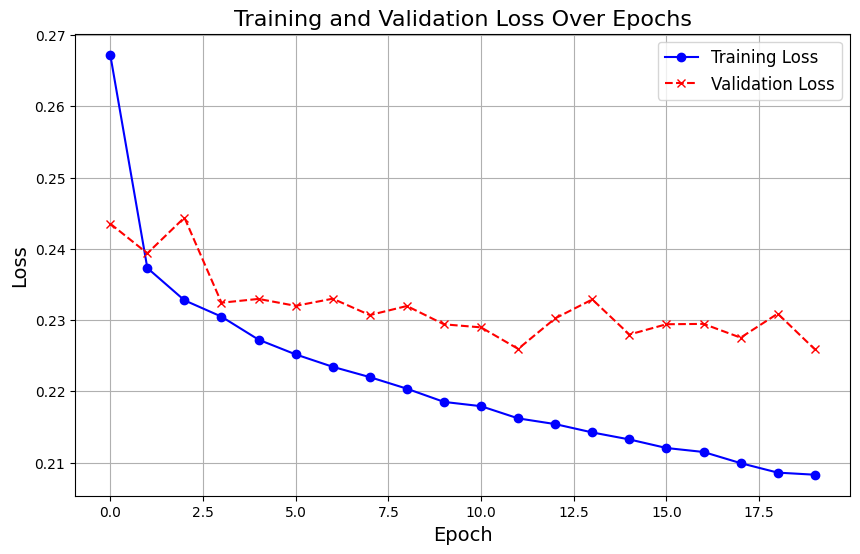

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue', linestyle='-', marker='o')
plt.plot(val_loss, label='Validation Loss', color='red', linestyle='--', marker='x')

plt.title('Training and Validation Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

plt.grid(True)
plt.legend(fontsize=12)
plt.show()

## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [33]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        correct += (torch.max(model(inputs), 1)[1] == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f'Accuracy on the test set: {100 * accuracy:.2f}%')

Accuracy on the test set: 87.25%
